In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [13, 7]
plt.rcParams['axes.facecolor'] = '#121417'
plt.rcParams['figure.facecolor'] = '#282C34'

In [55]:
df = pd.read_csv(filepath_or_buffer='Data\\msft.csv', header=1, index_col=0)
df['top_slope'] = pd.Series(float('NaN'), index=df.index)
df['bot_slope'] = pd.Series(float('NaN'), index=df.index)
df['bar_no'] = range(0, len(df))
df = df.set_index(keys='bar_no')
df = df.drop(['Open', 'Close', 'Adj Close', 'Volume'], axis='columns')

In [56]:
max_high_pos = df['High'].idxmax()
min_low_pos = df['Low'].idxmin()

top_support_points = [max_high_pos]
bot_support_pionts = [min_low_pos]

top_rot_pos = max_high_pos
bot_rot_pos = min_low_pos

if (max_high_pos > min_low_pos):
    positive_slope = True
else:
    positive_slope = False

if(positive_slope):
    startpos_high = 0
    endpos_high = top_rot_pos - 1
    startpos_low = bot_rot_pos + 1
    endpos_low = df.shape[0] - 1
else:
    startpos_high = top_rot_pos + 1
    endpos_high = df.shape[0] - 1
    startpos_low = 0
    endpos_low = bot_rot_pos - 1

In [58]:
'''
Calculate top-slope values for all positions
slope = (y-yi)/(x-xi)
'''

# Preparations
df['top_slope'] = pd.Series(float('NaN'), index=df.index)
length = endpos_high - startpos_high

# Get top rotation value
y = df.loc[top_rot_pos, 'High']
# Transforn to homogenous series
y = pd.Series(y, index=range(startpos_high, startpos_high + length))
# Get other 'High' values 
yi = df.loc[startpos_high:endpos_high, 'High']

# Get top rotation position
x = top_rot_pos
# Transforn to homogenous series
x = pd.Series(x, index=range(startpos_high, startpos_high + length))
# Get other position values 
xi = df.index.tolist()[startpos_high:endpos_high]

# Paste all series into formula
df.loc[startpos_high:endpos_high, 'top_slope'] = ((y.sub(yi)).div(x.sub(xi))).mul(100)

# Add closest support piont to list
top_support_points.append(df['top_slope'].idxmin())

In [59]:
'''
Calculate bot-slope values for all positions
slope = (y-yi)/(x-xi)
'''

# Preparations
df['bot_slope'] = pd.Series(float('NaN'), index=df.index)
length = endpos_low - startpos_low

# Get bottom rotation value
y = df.loc[bot_rot_pos, 'Low']
# Transforn to homogenous series
y = pd.Series(y, index=range(startpos_low, startpos_low + length))
# Get other 'Low' values 
yi = df.loc[startpos_low:endpos_low, 'Low']

# Get bottom rotation position
x = bot_rot_pos
# Transforn to homogenous series
x = pd.Series(x, index=range(startpos_low, startpos_low + length))
# Get other position values 
xi = df.index.tolist()[startpos_low:endpos_low]

# Paste all series into formula
df.loc[startpos_low:endpos_low, 'bot_slope'] = ((y.sub(yi)).div(x.sub(xi))).mul(100)

# Add closest support piont to list
top_support_points.append(df['bot_slope'].idxmin())

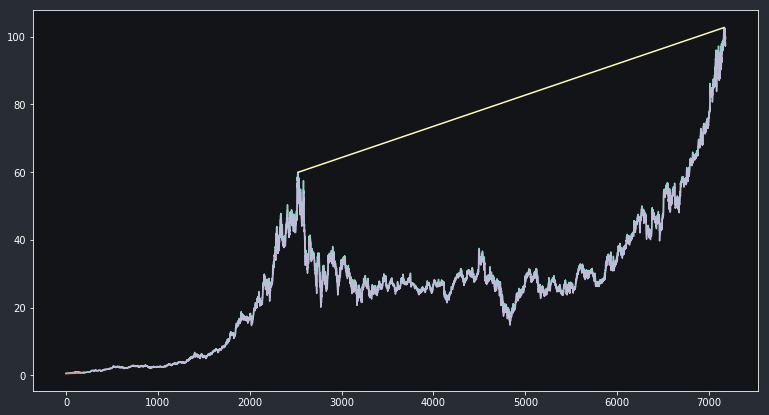

In [60]:
'''
Plot current state
'''

# plt.figure(1)
# plt.subplot(311)

plt.plot(df.index.values, df['High'])
x1 = df['top_slope'].idxmin()
x2 = top_rot_pos
y1 = df.loc[df['top_slope'].idxmin(), 'High']
y2 = df.loc[top_rot_pos, 'High']
plt.plot([x1, x2], [y1, y2])

plt.plot(df.index.values, df['Low'])
x1 = df['bot_slope'].idxmin()
x2 = bot_rot_pos
y1 = df.loc[df['bot_slope'].idxmin(), 'Low']
y2 = df.loc[bot_rot_pos, 'Low']
plt.plot([x1, x2], [y1, y2])

# plt.subplot(312)
# plt.plot(df.index.values, df['top_slope'])

# plt.subplot(313)
# plt.plot(df.index.values, df['bot_slope'])

In [61]:
'''
Set new rotation position plus start-/endpiont
'''

if(positive_slope):
    if df['top_slope'].min() < df['bot_slope'].min():
        top_rot_pos = df['top_slope'].idxmin()
        endpos_high = top_rot_pos - 1
    else:
        bot_rot_pos = df['bot_slope'].idxmin()
        startpos_low = bot_rot_pos + 1
    
else:
    if df['top_slope'].max() > df['bot_slope'].max():
        top_rot_pos = df['top_slope'].idxmax()
        startpos_high = top_rot_pos + 1
    else:
        bot_rot_pos = df['bot_slope'].idxmax()
        endpos_low = bot_rot_pos - 1 


In [62]:
'''
Will the distance between upper and lower channel line become bigger in the coming rotation?
If yes, abort. Optimum is already found.
'''



'\nWill the distance between upper and lower channel line become bigger in the coming rotation?\nIf yes, abort. Optimum is already found.\n'

In [63]:
'''
Calculate bot-slope values for all positions
slope = (y-yi)/(x-xi)
'''

# Preparations
df['bot_slope'] = pd.Series(float('NaN'), index=df.index)
length = endpos_low - startpos_low

# Get bottom rotation value
y = df.loc[bot_rot_pos, 'Low']
# Transforn to homogenous series
y = pd.Series(y, index=range(startpos_low, startpos_low + length))
# Get other 'Low' values 
yi = df.loc[startpos_low:endpos_low, 'Low']

# Get bottom rotation position
x = bot_rot_pos
# Transforn to homogenous series
x = pd.Series(x, index=range(startpos_low, startpos_low + length))
# Get other position values 
xi = df.index.tolist()[startpos_low:endpos_low]

# Paste all series into formula
df.loc[startpos_low:endpos_low, 'bot_slope'] = ((y.sub(yi)).div(x.sub(xi))).mul(100)

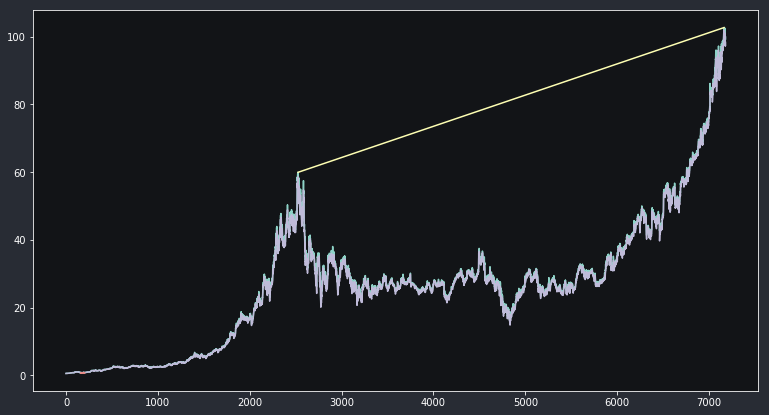

In [64]:
'''
Plot current state
'''

# plt.figure(1)
# plt.subplot(311)

plt.plot(df.index.values, df['High'])
x1 = df['top_slope'].idxmin()
x2 = top_rot_pos
y1 = df.loc[df['top_slope'].idxmin(), 'High']
y2 = df.loc[top_rot_pos, 'High']
plt.plot([x1, x2], [y1, y2])

plt.plot(df.index.values, df['Low'])
x1 = df['bot_slope'].idxmin()
x2 = bot_rot_pos
y1 = df.loc[df['bot_slope'].idxmin(), 'Low']
y2 = df.loc[bot_rot_pos, 'Low']
plt.plot([x1, x2], [y1, y2])

# plt.subplot(312)
# plt.plot(df.index.values, df['top_slope'])

# plt.subplot(313)
# plt.plot(df.index.values, df['bot_slope'])